In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
pd.set_option("display.max_columns",100)

In [101]:
import warnings
warnings.simplefilter("ignore")

In [102]:
df = pd.read_csv("failure.csv")

In [103]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [104]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [106]:
df.isnull().sum()

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [107]:
df.corr()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


In [108]:
df.shape

(124494, 12)

In [109]:
df[df.failure == 1].shape

(106, 12)

In [110]:
df["failure"].value_counts(normalize=True)*100 #arızalı ve saglam cihazlarin yuzde oranlari

0    99.914855
1     0.085145
Name: failure, dtype: float64

### Visualization 

<AxesSubplot:xlabel='failure'>

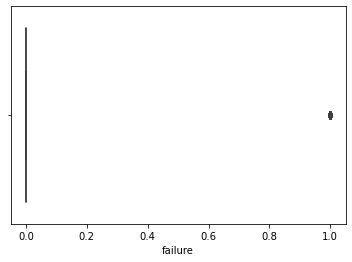

In [111]:
sns.boxplot(x = df['failure'])

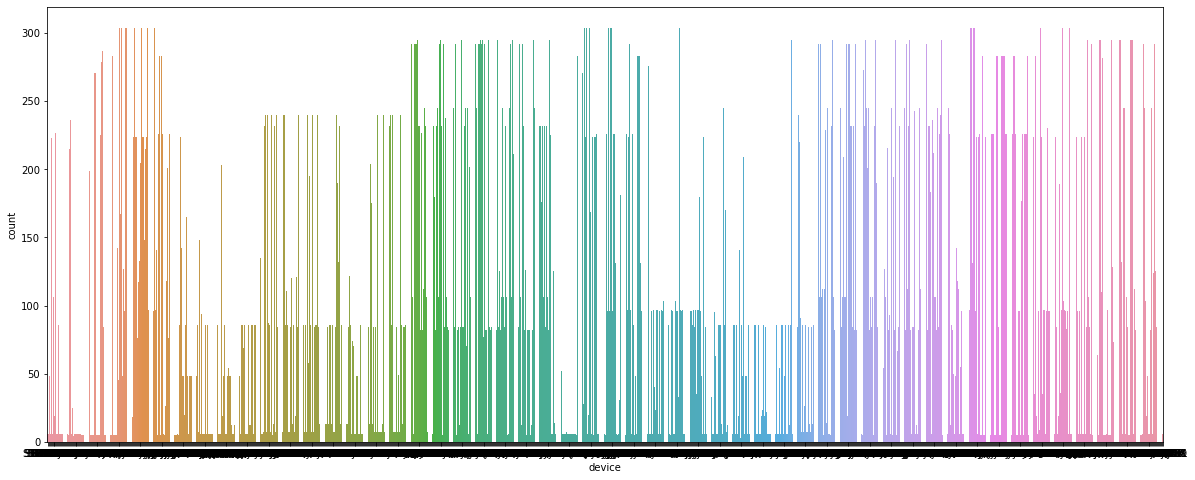

In [112]:
plt.figure(figsize=(20,8));
ax=sns.countplot(x=df["device"])



In [113]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

<AxesSubplot:xlabel='month'>

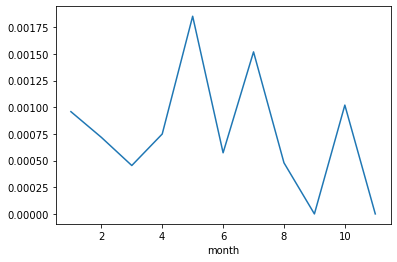

In [114]:
df.groupby('month')['failure'].mean().plot()
#en cok mayista bozulmus

In [115]:
data = pd.DataFrame() #new dataframe

Columns are grouped

In [116]:
data['work_days'] = df.groupby('device')['date'].max() - df.groupby('device')['date'].min()


In [117]:
data['work_days'] = data['work_days'].dt.days
data['work_days']

device
S1F01085      5
S1F013BB      5
S1F0166B      5
S1F01E6Y     47
S1F01JE0      5
           ... 
Z1F1VMZB    291
Z1F1VQFY    180
Z1F26YZB     83
Z1F282ZV     83
Z1F2PBHX     95
Name: work_days, Length: 1168, dtype: int64

In [118]:
data['total_mileage'] = df.groupby('device')['attribute6'].max() - df.groupby('device')['attribute6'].min() 

In [119]:
data['total_mileage']

device
S1F01085     1966
S1F013BB      209
S1F0166B     1612
S1F01E6Y    22097
S1F01JE0     1965
            ...  
Z1F1VMZB    77016
Z1F1VQFY    41296
Z1F26YZB    20406
Z1F282ZV    21311
Z1F2PBHX    16012
Name: total_mileage, Length: 1168, dtype: int64

In [120]:
data['att1'] = df.groupby('device')['attribute1'].max()/8
data['att1']

device
S1F01085    26953834.0
S1F013BB    30418260.0
S1F0166B    28042412.0
S1F01E6Y    30032246.0
S1F01JE0    29445357.0
               ...    
Z1F1VMZB    30295174.0
Z1F1VQFY    30383980.0
Z1F26YZB    30242296.0
Z1F282ZV    30396162.0
Z1F2PBHX    30491983.0
Name: att1, Length: 1168, dtype: float64

In [121]:
data['att2'] = df.groupby('device')['attribute2'].max()/2
data['att2']

device
S1F01085    28.0
S1F013BB     0.0
S1F0166B     0.0
S1F01E6Y     0.0
S1F01JE0     0.0
            ... 
Z1F1VMZB     0.0
Z1F1VQFY     0.0
Z1F26YZB     0.0
Z1F282ZV     0.0
Z1F2PBHX     0.0
Name: att2, Length: 1168, dtype: float64

In [122]:
data['att4'] = df.groupby('device')['attribute4'].max()

In [123]:
data['att3_9'] = df.groupby('device')['attribute3'].max()
data['att5'] = df.groupby('device')['attribute5'].max()
data['att7_8'] = df.groupby('device')['attribute7'].max()
data['failure'] = df.groupby('device')['failure'].max()

In [124]:
data

,work_days,total_mileage,att1,att2,att4,att3_9,att5,att7_8,failure
device,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,52,0,6,0,0
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0
S1F0166B,5,1612,28042412.0,0.0,0,3,6,0,0
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1
Z1F26YZB,83,20406,30242296.0,0.0,0,1,1,0,0


In [125]:
data['month'] = df.groupby('device')['month'].max()

In [126]:
liste = list()

for i in df.groupby('device')['device']:
    liste.append(i[0][0:3])

data['device_type'] = liste

In [127]:
data

,work_days,total_mileage,att1,att2,att4,att3_9,att5,att7_8,failure,month,device_type
device,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,52,0,6,0,0,1,S1F
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,S1F
S1F0166B,5,1612,28042412.0,0.0,0,3,6,0,0,1,S1F
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,S1F
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,S1F
...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,Z1F
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,Z1F
Z1F26YZB,83,20406,30242296.0,0.0,0,1,1,0,0,3,Z1F


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, S1F01085 to Z1F2PBHX
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   work_days      1168 non-null   int64  
 1   total_mileage  1168 non-null   int64  
 2   att1           1168 non-null   float64
 3   att2           1168 non-null   float64
 4   att4           1168 non-null   int64  
 5   att3_9         1168 non-null   int64  
 6   att5           1168 non-null   int64  
 7   att7_8         1168 non-null   int64  
 8   failure        1168 non-null   int64  
 9   month          1168 non-null   int64  
 10  device_type    1168 non-null   object 
dtypes: float64(2), int64(8), object(1)
memory usage: 141.8+ KB


In [129]:
data['att2'] = data['att2'].astype('category')
data['att3_9'] = data['att3_9'].astype('category')
data['att4'] = data['att4'].astype('category')
data['att5'] = data['att5'].astype('category')
data['att7_8'] = data['att7_8'].astype('category')


data["device_type"]=data["device_type"].astype("category")
data['month'] = data['month'].astype('category')

In [130]:
data

,work_days,total_mileage,att1,att2,att4,att3_9,att5,att7_8,failure,month,device_type
device,,,,,,,,,,,
S1F01085,5,1966,26953834.0,28.0,52,0,6,0,0,1,S1F
S1F013BB,5,209,30418260.0,0.0,0,0,5,0,0,5,S1F
S1F0166B,5,1612,28042412.0,0.0,0,3,6,0,0,1,S1F
S1F01E6Y,47,22097,30032246.0,0.0,0,0,12,0,0,2,S1F
S1F01JE0,5,1965,29445357.0,0.0,0,0,6,0,0,1,S1F
...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,291,77016,30295174.0,0.0,0,0,5,0,0,10,Z1F
Z1F1VQFY,180,41296,30383980.0,0.0,0,0,7,0,1,6,Z1F
Z1F26YZB,83,20406,30242296.0,0.0,0,1,1,0,0,3,Z1F


Scaling

In [131]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [132]:
S = StandardScaler()

In [133]:
data[['att1', 'total_mileage', 'work_days']] = S.fit_transform(data[['att1', 'total_mileage', 'work_days']])

In [134]:
data.head()

,work_days,total_mileage,att1,att2,att4,att3_9,att5,att7_8,failure,month,device_type
device,,,,,,,,,,,
S1F01085,-1.025220,-0.804348,-0.442297,28.0,52,0,6,0,0,1,S1F
S1F013BB,-1.025220,-0.852462,0.505001,0.0,0,0,5,0,0,5,S1F
S1F0166B,-1.025220,-0.814042,-0.144641,0.0,0,3,6,0,0,1,S1F
S1F01E6Y,-0.621165,-0.253074,0.399451,0.0,0,0,12,0,0,2,S1F
S1F01JE0,-1.025220,-0.804375,0.238975,0.0,0,0,6,0,0,1,S1F


In [135]:
y = data["failure"]
x = data.drop(["failure"],axis=1)

In [136]:
y

device
S1F01085    0
S1F013BB    0
S1F0166B    0
S1F01E6Y    0
S1F01JE0    0
           ..
Z1F1VMZB    0
Z1F1VQFY    1
Z1F26YZB    0
Z1F282ZV    0
Z1F2PBHX    0
Name: failure, Length: 1168, dtype: int64

In [137]:
x = pd.get_dummies(x, drop_first=True)


In [138]:
x

,work_days,total_mileage,att1,att2_4.0,att2_8.0,att2_12.0,att2_16.0,att2_28.0,att2_36.0,att2_44.0,att2_48.0,att2_52.0,att2_56.0,att2_60.0,att2_68.0,att2_72.0,att2_80.0,att2_84.0,att2_88.0,att2_96.0,att2_100.0,att2_104.0,att2_116.0,att2_120.0,att2_148.0,att2_152.0,att2_172.0,att2_180.0,att2_188.0,att2_196.0,att2_220.0,att2_228.0,att2_232.0,att2_252.0,att2_256.0,att2_260.0,att2_264.0,att2_276.0,att2_308.0,att2_316.0,att2_324.0,att2_356.0,att2_368.0,att2_380.0,att2_396.0,att2_408.0,att2_460.0,att2_468.0,att2_480.0,att2_488.0,...,att5_62,att5_63,att5_64,att5_65,att5_66,att5_67,att5_68,att5_70,att5_78,att5_89,att5_90,att5_91,att5_92,att5_94,att5_95,att5_98,att7_8_6,att7_8_8,att7_8_16,att7_8_22,att7_8_24,att7_8_32,att7_8_40,att7_8_48,att7_8_56,att7_8_72,att7_8_96,att7_8_104,att7_8_112,att7_8_128,att7_8_152,att7_8_176,att7_8_216,att7_8_312,att7_8_424,att7_8_736,att7_8_744,att7_8_832,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_type_W1F,device_type_Z1F
device,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S1F01085,-1.025220,-0.804348,-0.442297,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
S1F013BB,-1.025220,-0.852462,0.505001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
S1F0166B,-1.025220,-0.814042,-0.144641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
S1F01E6Y,-0.621165,-0.253074,0.399451,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
S1F01JE0,-1.025220,-0.804375,0.238975,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z1F1VMZB,1.726206,1.250844,0.471345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
Z1F1VQFY,0.658345,0.272677,0.495628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Z1F26YZB,-0.274831,-0.299381,0.456886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Modelling

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [141]:
#!pip install imblearn

In [142]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [143]:
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [144]:
x_train_res.shape

(1700, 320)

In [145]:
y_train_res.shape

(1700,)

In [147]:
y_train_res

0       0
1       0
2       0
3       0
4       0
       ..
1695    1
1696    1
1697    1
1698    1
1699    1
Name: failure, Length: 1700, dtype: int64

In [148]:
y_train_res[y_train_res == 1], y_train_res[y_train_res == 0]

(18      1
 33      1
 34      1
 41      1
 44      1
        ..
 1695    1
 1696    1
 1697    1
 1698    1
 1699    1
 Name: failure, Length: 850, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 929    0
 930    0
 931    0
 932    0
 933    0
 Name: failure, Length: 850, dtype: int64)

In [149]:
x_train_res

,work_days,total_mileage,att1,att2_4.0,att2_8.0,att2_12.0,att2_16.0,att2_28.0,att2_36.0,att2_44.0,att2_48.0,att2_52.0,att2_56.0,att2_60.0,att2_68.0,att2_72.0,att2_80.0,att2_84.0,att2_88.0,att2_96.0,att2_100.0,att2_104.0,att2_116.0,att2_120.0,att2_148.0,att2_152.0,att2_172.0,att2_180.0,att2_188.0,att2_196.0,att2_220.0,att2_228.0,att2_232.0,att2_252.0,att2_256.0,att2_260.0,att2_264.0,att2_276.0,att2_308.0,att2_316.0,att2_324.0,att2_356.0,att2_368.0,att2_380.0,att2_396.0,att2_408.0,att2_460.0,att2_468.0,att2_480.0,att2_488.0,...,att5_62,att5_63,att5_64,att5_65,att5_66,att5_67,att5_68,att5_70,att5_78,att5_89,att5_90,att5_91,att5_92,att5_94,att5_95,att5_98,att7_8_6,att7_8_8,att7_8_16,att7_8_22,att7_8_24,att7_8_32,att7_8_40,att7_8_48,att7_8_56,att7_8_72,att7_8_96,att7_8_104,att7_8_112,att7_8_128,att7_8_152,att7_8_176,att7_8_216,att7_8_312,att7_8_424,att7_8_736,att7_8_744,att7_8_832,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,device_type_W1F,device_type_Z1F
0,1.148984,0.473952,0.519893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.015600,-0.858185,-0.259024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.177326,-0.513170,0.523492,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,-1.015600,-0.858158,0.063887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.274049,0.435395,0.508183,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,-0.878149,-0.400299,0.082647,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1696,0.258110,0.054155,0.473953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1697,0.190223,-0.071061,0.520619,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1698,-0.643062,-0.184848,0.478965,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [172]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [173]:
gbc = GradientBoostingClassifier()
r = RandomForestClassifier()
d = DecisionTreeClassifier()
log = LogisticRegression()
k = KNeighborsClassifier()
g = GaussianNB()
b = BernoulliNB()

In [168]:
algorithms = [g,b,k,log,gbc,r,d]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'GradientBoosting','RandomForest','DecisionTree'] 

In [170]:
algorithms = [g,b,k,log,gbc,r,d]
names = ['GaussianNB', 'BernoulliNB', 'K Nearest', 'Logistic', 'GradientBoosting','RandomForest','DecisionTree'] 

def algo_test(A, b, algorithms = algorithms, names= names):
    for i in range (len(algorithms)):
        algorithms[i] = algorithms[i].fit(A,b)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    
    for i in range (len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(x)))
        precision.append(precision_score(y,algorithms[i].predict(x)))
        recall.append(recall_score(y,algorithms[i].predict(x)))
        f1.append(f1_score(y,algorithms[i].predict(x)))
        
    metrics = pd.DataFrame(columns=['Accuracy','Precision', 'Recall','F1'], index = names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1',ascending = False)

In [171]:
algo_test(x_train_res, y_train_res)

,Accuracy,Precision,Recall,F1
DecisionTree,0.992295,0.961905,0.952830,0.957346
RandomForest,0.988014,0.969388,0.896226,0.931373
GradientBoosting,0.987158,0.917431,0.943396,0.930233
Logistic,0.902397,0.474359,0.698113,0.564885
K Nearest,0.880993,0.421801,0.839623,0.561514
BernoulliNB,0.882705,0.418848,0.754717,0.538721
GaussianNB,0.345034,0.119075,0.971698,0.212152


# Deep Learning

In [176]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [177]:
model = Sequential()

In [179]:
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [180]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [181]:
history = model.fit(x,y, epochs=150, batch_size=10, verbose=1)

Epoch 1/150
117/117 [==============================] - 2s 2ms/step - loss: 0.6709 - accuracy: 0.9041
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 0.6289 - accuracy: 0.9092
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.9092
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5574 - accuracy: 0.9092
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5274 - accuracy: 0.9092
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 0.5007 - accuracy: 0.9092
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.9092
Epoch 8/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.9092
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.9092
Epoch 10/150
117/117 [==============================] - 0s 2ms/step - loss: 0.4210 - accura

In [182]:
scores = model.evaluate(x,y)

37/37 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.9092


In [183]:
model.metrics_names[1],scores[1]*100

('accuracy', 90.9246563911438)